# Modelos de regresión

portifolio de Nicolau Freitas

### Objeto de estudio:

En este fichero hice el uso de diferentes modelos de regresión para llegar a la mejor predicción posible.

#### Evaluación de los modelos:

Primeramente verifiqué la correlación de cada una de las variables independientes con la variable de interés. Luego ploté el gráfico residual para las que tenían mayor correlación para verificar si la hipótesis de linearidad era válida. Por último, los  modelos fueron evaluados utilizando el método conocido como R^2

#### La base de datos:

Para este notebook yo junté dos bases de datos distintas, una con la puntuación de felicidad para cada país con otra conteniendo datos socioeconómicos de los países. Ambas bases han sido obtenida en Kaggle.

Puntuación de felicidad:
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2022

Datos Socioeconómicos:
https://www.kaggle.com/datasets/ashydv/country-socioeconomic-data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:\NPF\Data Science\DataSets\World Happiness Report 2022.csv')

In [3]:
data.head(20)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388
6,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512
7,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474
8,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143
9,10,New Zealand,7.200,7.279,7.120,1.954,1.852,1.235,0.752,0.680,0.245,0.483


In [4]:
data.dtypes

RANK                                            int64
Country                                        object
Happiness score                               float64
Whisker-high                                  float64
Whisker-low                                   float64
Dystopia (1.83) + residual                    float64
Explained by: GDP per capita                  float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
dtype: object

In [5]:
data.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [6]:
data.drop(['RANK','Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'], axis=1, inplace=True)

In [7]:
data.head()

,Country,Happiness score
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415


In [8]:
data2 = pd.read_csv(r'C:\NPF\Data Science\DataSets\Country-data.csv')

In [9]:
data2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
df=pd.merge(left=data, right=data2, left_on='Country', right_on='country')

In [11]:
df.head()

,Country,Happiness score,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Finland,7.821,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
1,Denmark,7.636,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
2,Iceland,7.557,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
3,Switzerland,7.512,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
4,Netherlands,7.415,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300


In [12]:
df.describe()

,Happiness score,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,5.673509,30.404545,39.568082,7.179091,43.026963,18420.163636,7.823164,72.602727,2.612727,14981.845455
std,1.076228,35.049646,26.748956,2.720869,23.977196,16100.972961,11.913233,8.090559,1.368282,18459.698211
min,2.404000,2.600000,0.109000,1.970000,0.065900,918.000000,-3.220000,52.000000,1.150000,399.000000
25%,4.945250,6.000000,23.925000,5.080000,28.200000,5457.500000,1.615000,68.500000,1.595000,2180.000000
50%,5.764500,16.550000,32.400000,6.810000,37.300000,13250.000000,5.175000,74.600000,2.145000,6605.000000
75%,6.462000,42.525000,49.550000,9.085000,53.225000,28700.000000,10.027500,79.500000,2.942500,21850.000000
max,7.821000,160.000000,200.000000,17.900000,174.000000,72100.000000,104.000000,82.800000,6.550000,87800.000000


In [13]:
df.drop(['country'], axis=1, inplace=True)

In [14]:
df.head()

,Country,Happiness score,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Finland,7.821,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
1,Denmark,7.636,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
2,Iceland,7.557,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
3,Switzerland,7.512,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
4,Netherlands,7.415,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300


In [15]:
df.corr()

,Happiness score,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Happiness score,1.000000,-0.679771,0.343463,0.452344,0.153627,0.761684,-0.288456,0.727920,-0.621705,0.748621
child_mort,-0.679771,1.000000,-0.341908,-0.312935,-0.227666,-0.620975,0.351721,-0.884172,0.908071,-0.515225
exports,0.343463,-0.341908,1.000000,-0.003340,0.882438,0.486327,-0.159509,0.316342,-0.316019,0.310942
health,0.452344,-0.312935,-0.003340,1.000000,0.046509,0.438010,-0.282304,0.373973,-0.281756,0.553066
imports,0.153627,-0.227666,0.882438,0.046509,1.000000,0.246512,-0.224875,0.193160,-0.231596,0.114133
income,0.761684,-0.620975,0.486327,0.438010,0.246512,1.000000,-0.266542,0.704174,-0.543297,0.926979
inflation,-0.288456,0.351721,-0.159509,-0.282304,-0.224875,-0.266542,1.000000,-0.324399,0.329371,-0.282387
life_expec,0.727920,-0.884172,0.316342,0.373973,0.193160,0.704174,-0.324399,1.000000,-0.834792,0.638083
total_fer,-0.621705,0.908071,-0.316019,-0.281756,-0.231596,-0.543297,0.329371,-0.834792,1.000000,-0.439095
gdpp,0.748621,-0.515225,0.310942,0.553066,0.114133,0.926979,-0.282387,0.638083,-0.439095,1.000000


Aquí podemos ver cuales son los indices sociales que tienen mayor correlación de linearidad con la variable de interés 'Happiness Score'. Los índices con mayor correlación són: Mortandad infantil, Salud, Renta, Expectativa de vida y PIB per capta.

In [16]:
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

A seguir he plotada para cada una de las variables independientes con mayor correlación con la variable de interés, el gráfico con la regresión linear y al lado el gráfico de residuales para verificar si la hipótesis de linearidad es válida.

C:\Users\Nicolau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='child_mort', ylabel='Happiness score'>

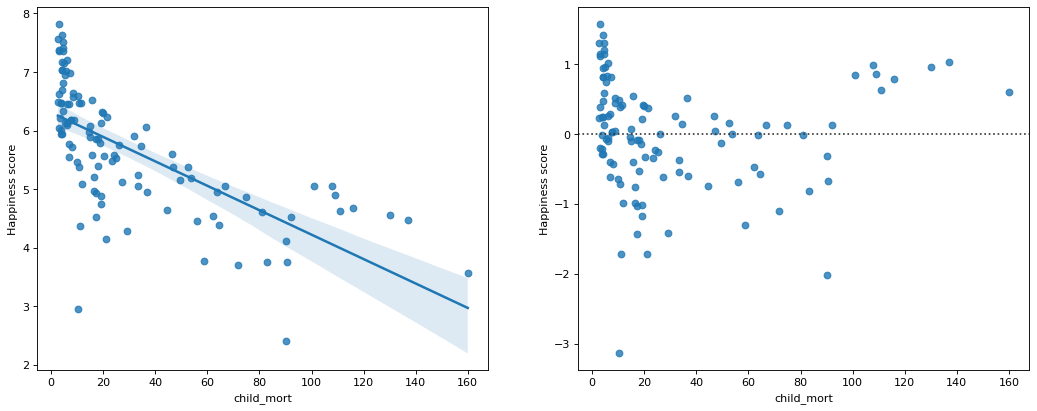

In [18]:
plt.figure(figsize=(16,6), dpi=80)
plt.subplot(1,2,1)
sns.regplot(x='child_mort', y='Happiness score', data=df)
plt.subplot(1,2,2)
sns.residplot(df['child_mort'], df['Happiness score'])

C:\Users\Nicolau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='Happiness score'>

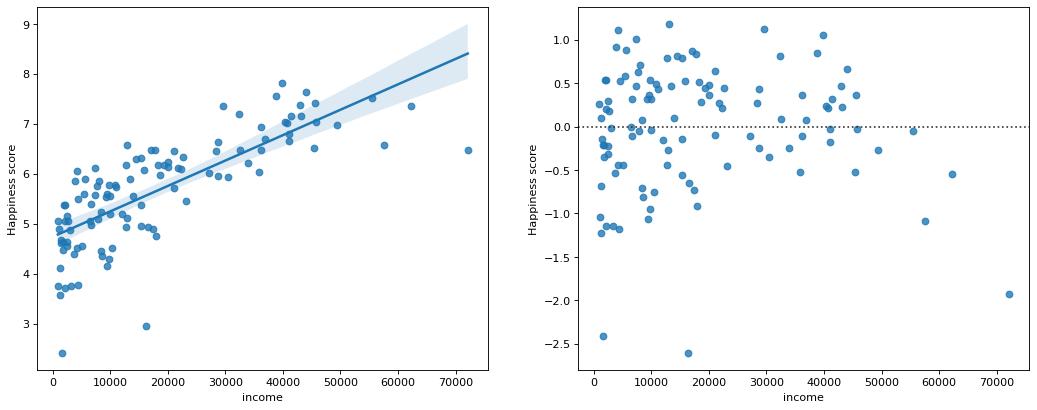

In [19]:
plt.figure(figsize=(16,6), dpi=80)
plt.subplot(1,2,1)
sns.regplot(x='income', y='Happiness score', data=df)
plt.subplot(1,2,2)
sns.residplot(df['income'], df['Happiness score'])

C:\Users\Nicolau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='life_expec', ylabel='Happiness score'>

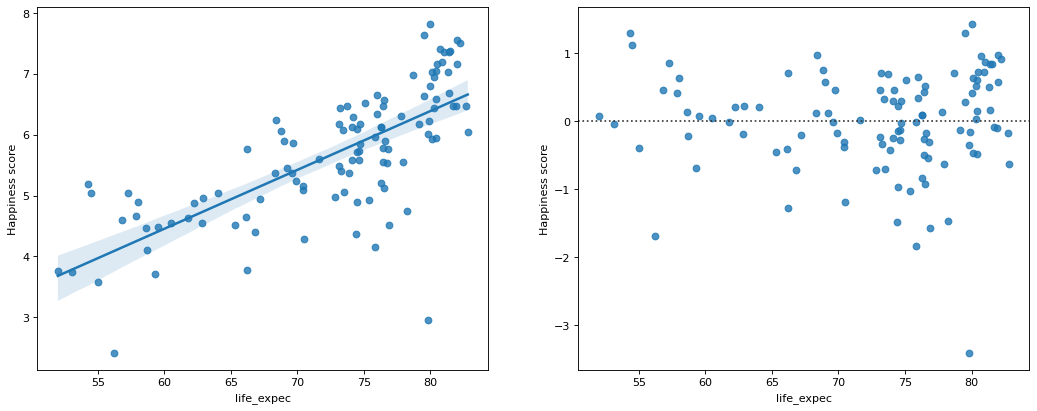

In [20]:
plt.figure(figsize=(16,6), dpi=80)
plt.subplot(1,2,1)
sns.regplot(x='life_expec', y='Happiness score', data=df)
plt.subplot(1,2,2)
sns.residplot(df['life_expec'], df['Happiness score'])

C:\Users\Nicolau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_fer', ylabel='Happiness score'>

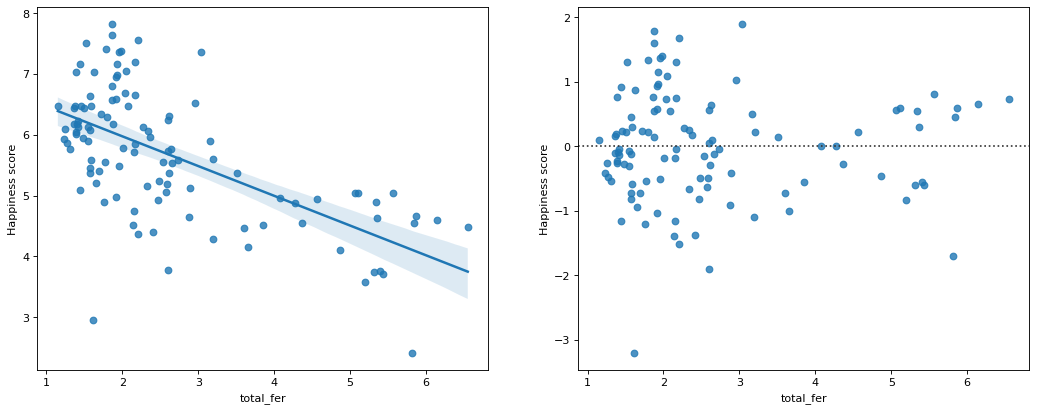

In [21]:
plt.figure(figsize=(16,6), dpi=80)
plt.subplot(1,2,1)
sns.regplot(x='total_fer', y='Happiness score', data=df)
plt.subplot(1,2,2)
sns.residplot(df['total_fer'], df['Happiness score'])

C:\Users\Nicolau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdpp', ylabel='Happiness score'>

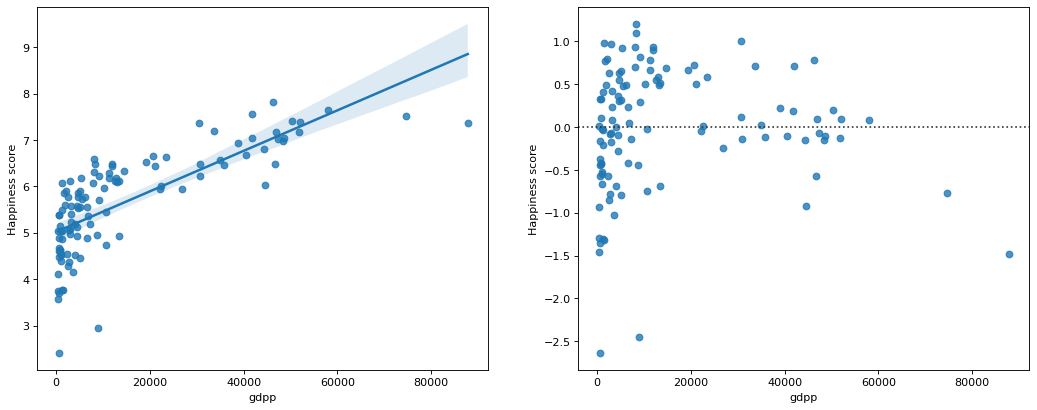

In [22]:
plt.figure(figsize=(16,6), dpi=80)
plt.subplot(1,2,1)
sns.regplot(x='gdpp', y='Happiness score', data=df)
plt.subplot(1,2,2)
sns.residplot(df['gdpp'], df['Happiness score'])

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
variables = ['child_mort', 'income', 'life_expec', 'total_fer', 'gdpp']

for i in variables:
    X = df[[i]]
    Y = df['Happiness score']
    lm.fit(X,Y)
    print('El valor de R^2 para {} es: '.format(i), lm.score(X,Y))

El valor de R^2 para child_mort es:  0.4620887278452537
El valor de R^2 para income es:  0.5801621158062868
El valor de R^2 para life_expec es:  0.5298671854892372
El valor de R^2 para total_fer es:  0.3865173985610756
El valor de R^2 para gdpp es:  0.560433517884634


Las variables income(renta) y gdpp(PIB per capta) tiene los mayores R^2, pero ambas estan muy relacionadas entre ellas. El la tabla de correlaciones(coeficiente pearson) se nota que la relacion entre estas variables es de 0.926979, por tanto, para una análisis de regresión linear con multiples variables podemos eliminar una de las dos. Matendré la variable renta pues esta presenta un R^2 ligeramente superior. 

In [26]:
lmm = LinearRegression()
Z=df[['child_mort', 'income', 'life_expec', 'total_fer']]
lmm.fit(Z, Y)
print(lmm.score(Z, Y))

0.6595327773688313


Arriba vemos que el R^2 para una regresión multiple utilizando las principales variables es de 0.6595. Esto significa que esta variables juntas explican 65,65% de las variaciones de la variable de interés. Abajo analizaremos una regresión linear con multiles variables utilizando todas las variables disponibles para verificar el R^2

In [27]:
df.columns

Index(['Country', 'Happiness score', 'child_mort', 'exports', 'health',
       'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [28]:
lmm2 = LinearRegression()
Z2=df[['child_mort', 'exports', 'health',
       'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
lmm2.fit(Z2, Y)
print(lmm2.score(Z2, Y))

0.7013900741577879


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.10, random_state=1)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
from sklearn.metrics import r2_score

In [32]:
for i in range(2,6):
    poly = PolynomialFeatures(degree=i)
    xt_train = poly.fit_transform(x_train)
    lmt = LinearRegression()
    lmt.fit(xt_train, y_train)
    xt_test = poly.fit_transform(x_test)    
    yhat_t = lmt.predict(xt_test)
    print('para el grado {}'.format(i), 'el valor de R^2 es igual a: ', r2_score(y_test, yhat_t)) 

para el grado 2 el valor de R^2 es igual a:  -0.03406809369926034
para el grado 3 el valor de R^2 es igual a:  -2.0747379986205163
para el grado 4 el valor de R^2 es igual a:  -3.6804348703338166
para el grado 5 el valor de R^2 es igual a:  -7.23177779047079


Usando regresiones polinomiales, se puede notar que el R^2 es negativo. Cuanto mayor el grado del polinomio, mas negativo. R^2 negativos significan overfiting, por tanto el modelo está ajustandose al ruido mas que a la media y por esta razón no es un buen modelo para hacer predicciones.

 A seguir utilizaré el modelo que obtuvo el mejor R^2(el linear que utiliza a todas las variables) para predecir los indices de felicidad de los países que no tenemos índice de felicidad pero sí tenemos los demás datos socioecoonómicos.

In [33]:
paises = df['Country'].unique()

In [34]:
df_pred = data2[~data2['country'].isin(paises)]

In [35]:
df_pred.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000


In [36]:
Z_pred=df_pred[['child_mort', 'exports', 'health',
       'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [37]:
pred_happiness = lmm2.predict(Z_pred)

In [38]:
df_pred['pred Happ score'] = pred_happiness

C:\Users\Nicolau\AppData\Local\Temp\ipykernel_14252\2714507320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['pred Happ score'] = pred_happiness


df_pred.head(20)

In [40]:
df_pred.loc[df_pred['pred Happ score']>6]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pred Happ score
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,6.111343
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,6.546485
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,6.247228
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,6.609400
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,8.682101
115,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19300,6.012747
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,7.190313
134,Slovak Republic,7.0,76.3,8.79,77.8,25200,0.485,75.5,1.43,16600,6.108270


In [41]:
print('el intercept es:', lmm2.intercept_, 'y los coeficientes son:', lmm2.coef_)


el intercept es: 3.7379661541223044 y los coeficientes son: [-5.22019866e-03  1.54714946e-02  4.56449300e-02 -1.42746329e-02
 -5.34503711e-06 -1.78670596e-03  2.32090113e-02 -6.95232198e-02
  2.52058522e-05]


Con los datos arriba podemos escribir la ecuación de la curva calculada por el modelo de regresión. Para esto voy a encortar los nombres de las variables:

* HS - Happiness Score (Índice de felicidad)
* CM - Child mortality (Mortandad infantil)
* EX - Exportations (Exportaciones)
* HE - Health (Salud)
* IP - Iports (Imporationes)
* IN - Income (Renta)
* IF - Inflation (Inflación)
* LE - Life expectacy (Expectativa de vida)
* TF - Total Fertility (Fertilidad)
* GP - GDP per capta (PIB per capta)

la ecuación queda así:
HS = 3.74 - 0.0052CM + 0.0155EX + 0.0456HE - 0.0143IP - 0.00000535IN - 0.00179IF + 0.0232LE - 0.0695TF + 0.0000252GP

Esta ecuación nos ayuda a entender cuales son las variables que tienen mayor inpacto en el 'Índice de Felicidad'. Los mayores valores absolutos tiene mayor inpacto.
